### load the dataset

In [427]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import plotly.express as px

In [2]:
df = pd.read_csv('Crop_recommendation.csv')

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
df.isnull().sum() 

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

### EDA 

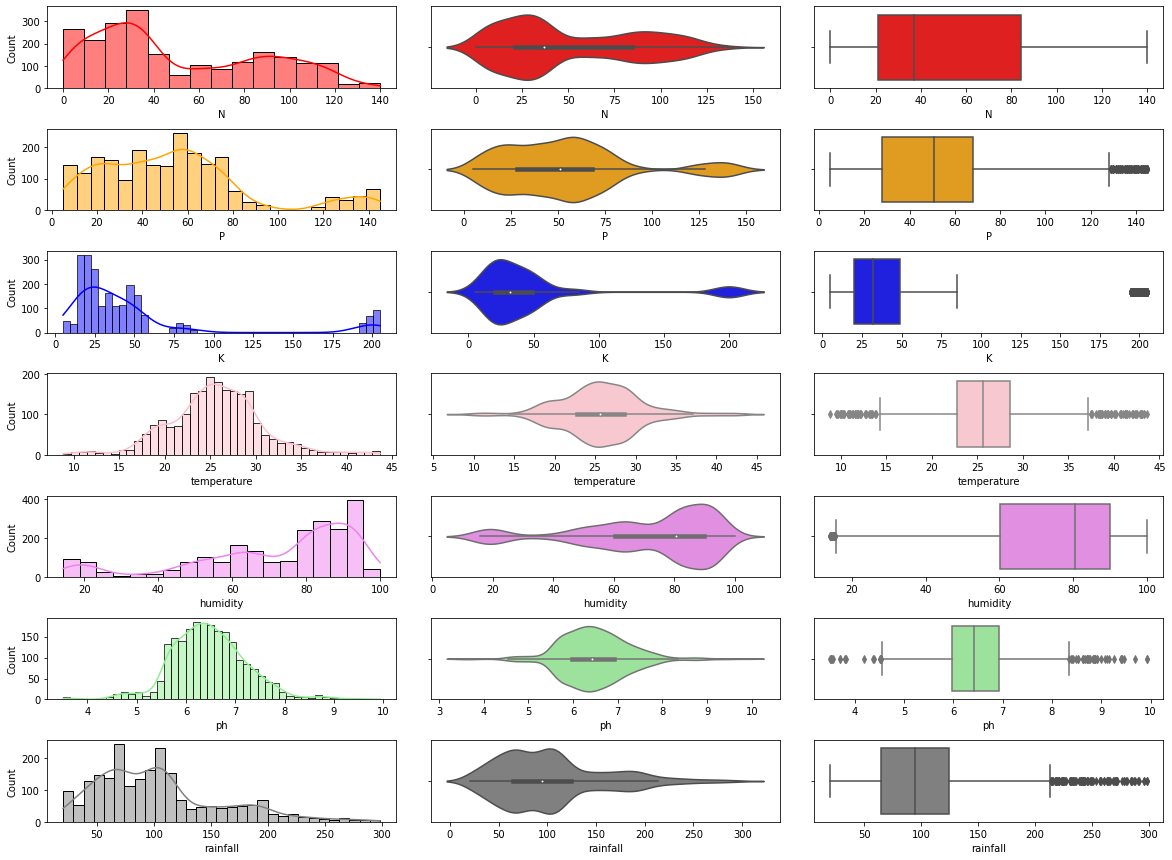

In [457]:
fig, axes  = plt.subplots(7, 3, figsize=(20,15), gridspec_kw=dict(hspace=0.5, wspace=0.1))
colors= ['red', 'orange', 'blue', 'pink', 'violet', 'lightgreen', 'grey']
for i, j in enumerate(df.columns[:-1]):
    sns.histplot(data=df, x=j, ax=axes[i,0], kde=True, color=colors[i])
    sns.violinplot(data=df, x=j, ax=axes[i,1], color=colors[i])
    sns.boxplot(data=df, x=j, ax=axes[i,2], color=colors[i])

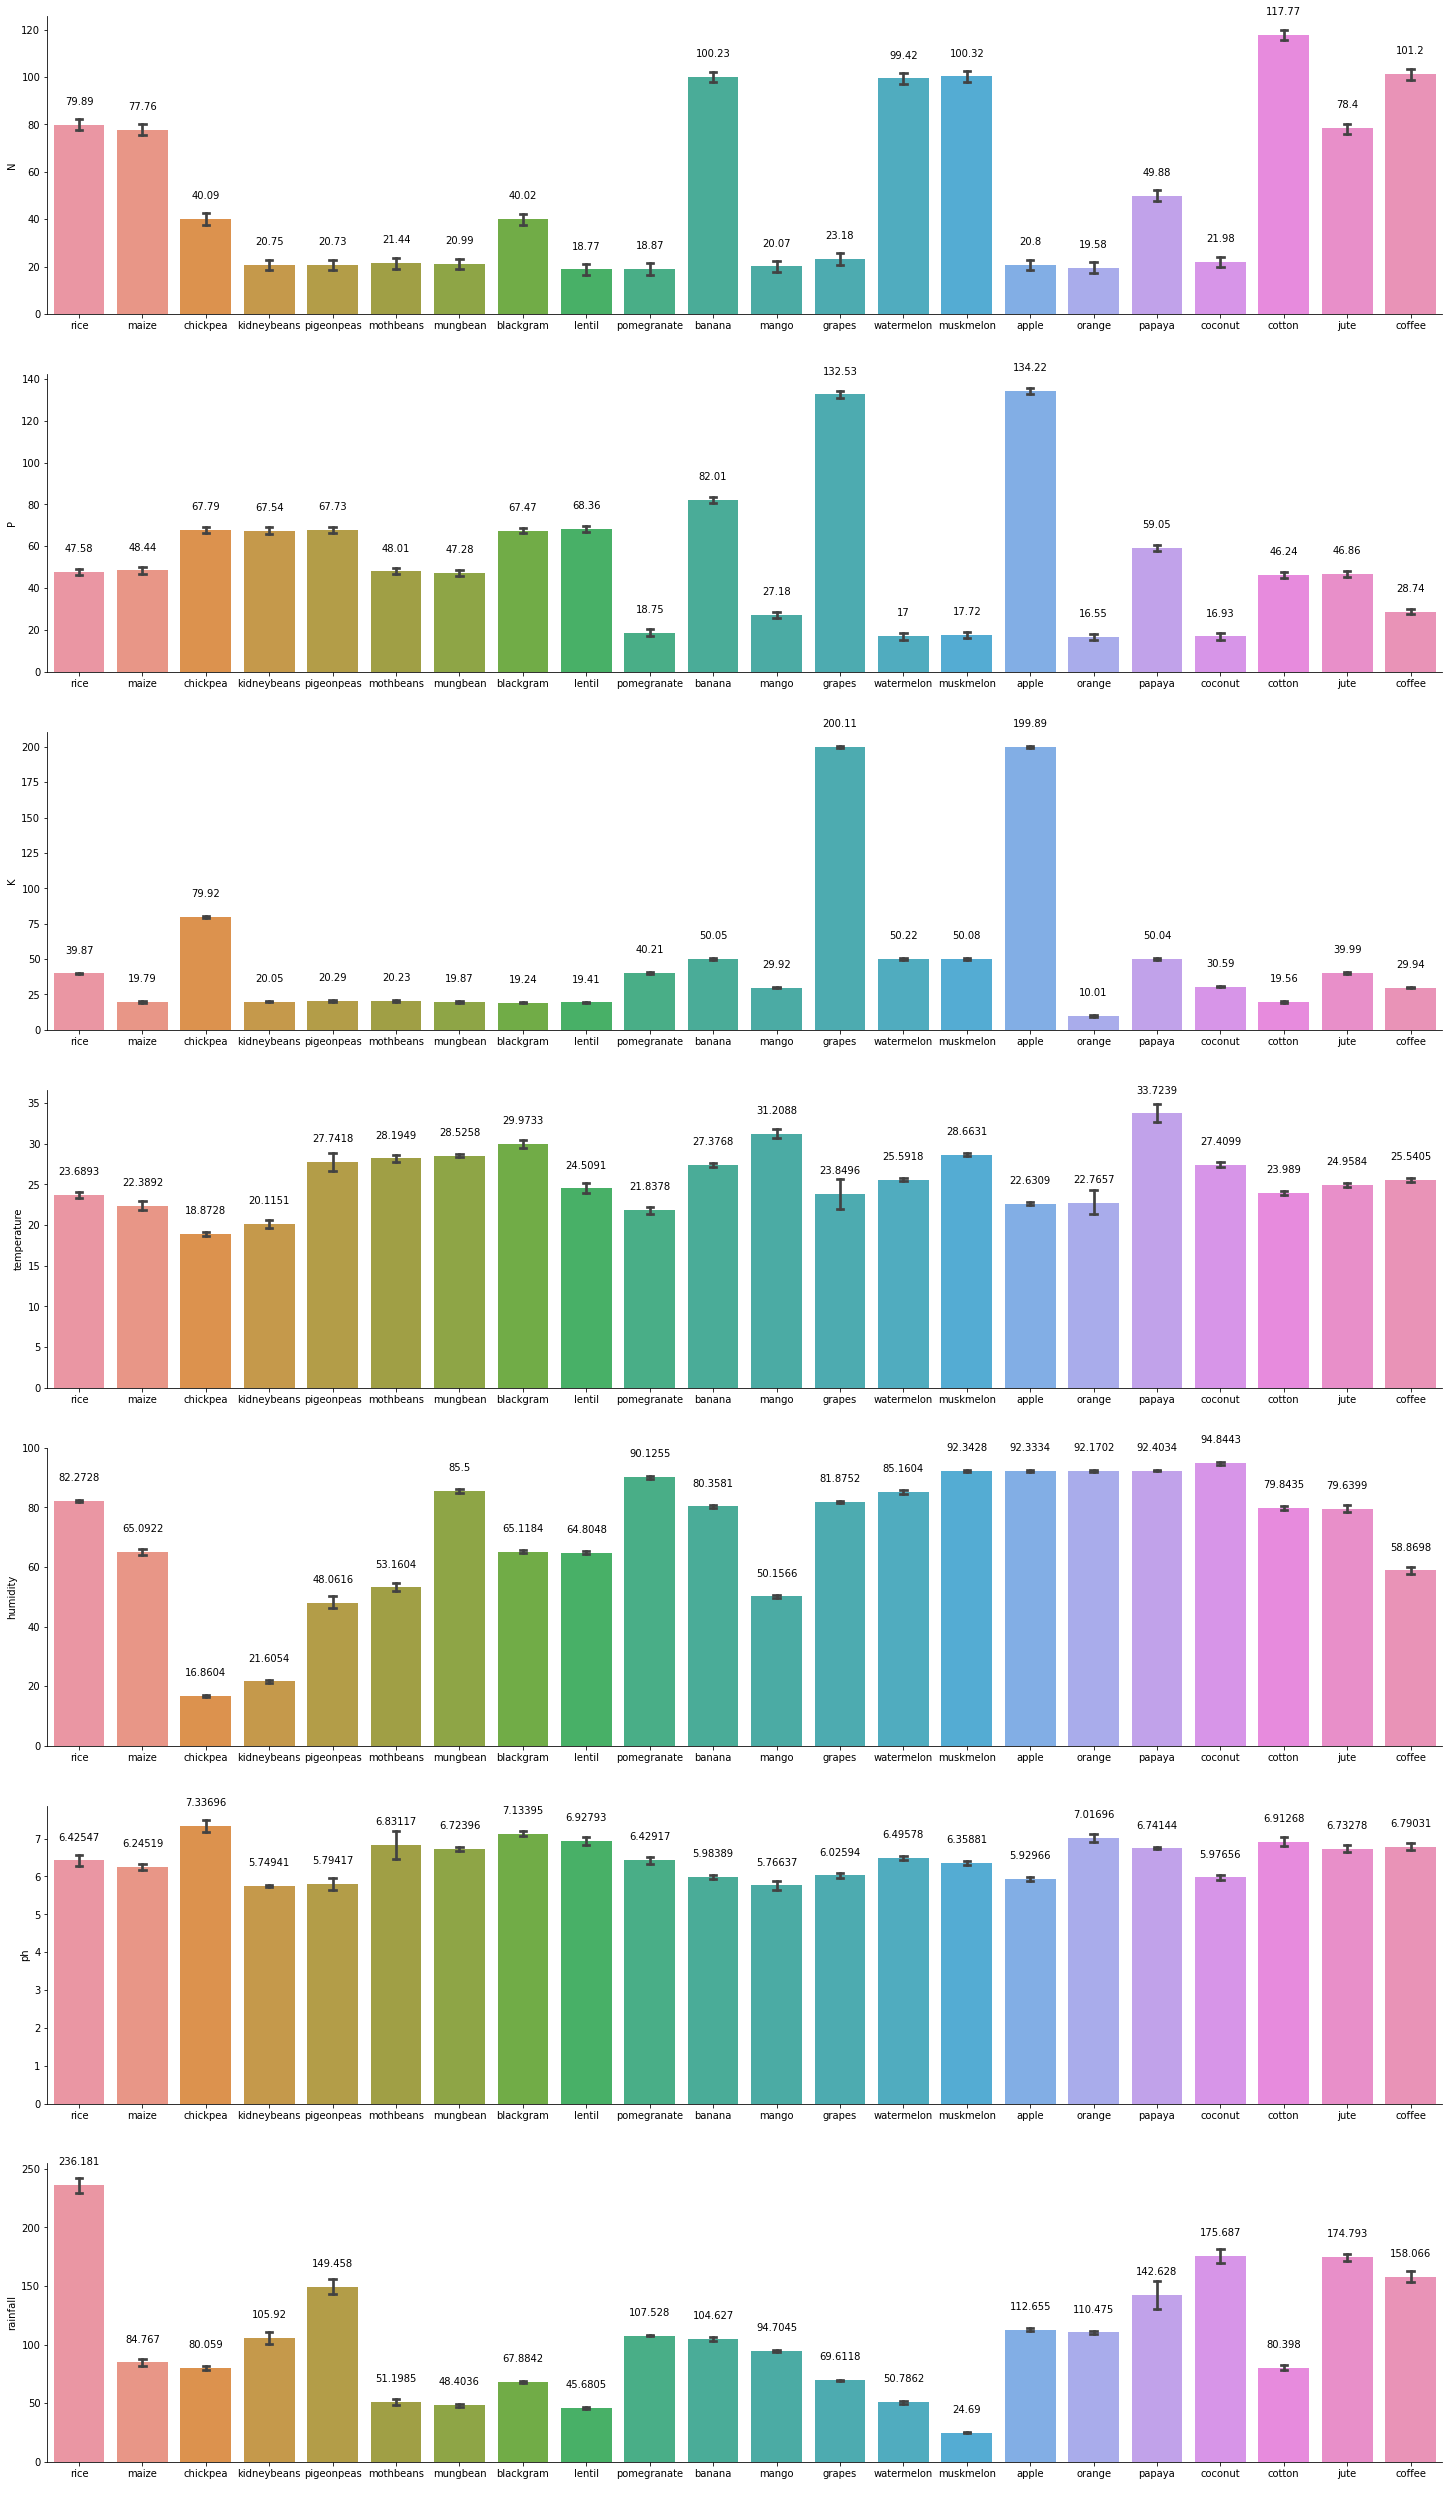

In [466]:
fig, axes  = plt.subplots(7, 1, figsize=(25,45), gridspec_kw=dict(hspace=0.2))
for i, j in enumerate(df.columns[:-1]):
    sns.barplot(data=df, x='label', y=j, capsize=0.1, ax=axes[i])
    axes[i].set_xlabel(' ')
for a in fig.axes:
    for c in a.containers:
        a.bar_label(c, padding=18)
    a.spines[['top', 'right']].set_visible(False)

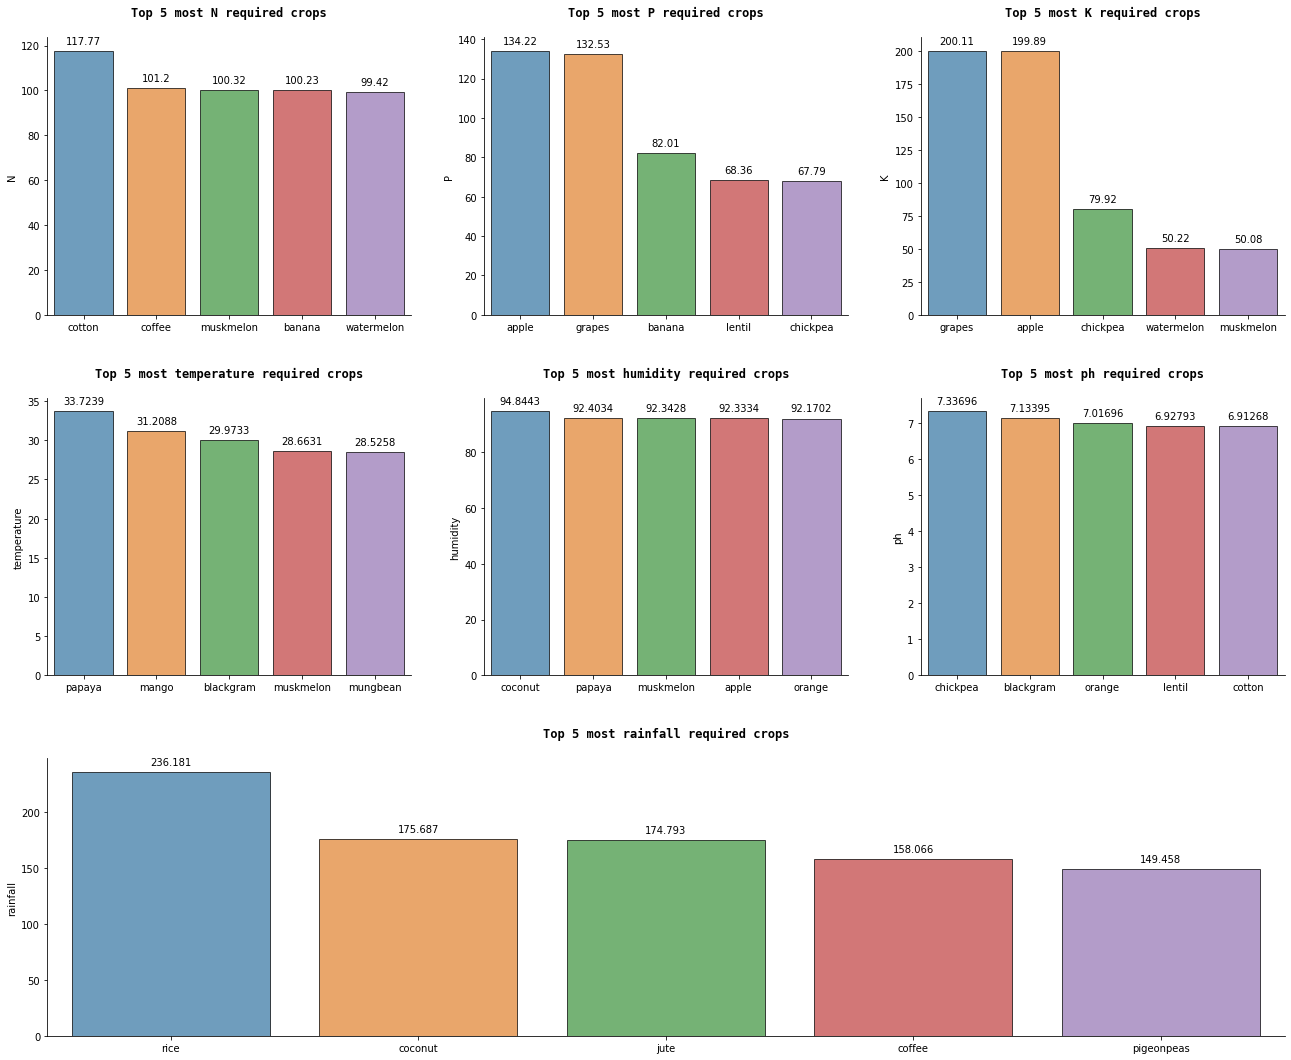

In [464]:
fig = plt.figure(figsize=(30,25))
grid = plt.GridSpec(4,4, hspace=0.3)
sns.barplot(data = df.groupby('label').mean()['N'].sort_values(ascending=False)[:5].reset_index(), x='label', y='N', ax=fig.add_subplot(grid[1,1]), alpha=0.7, edgecolor='black')
sns.barplot(data = df.groupby('label').mean()['P'].sort_values(ascending=False)[:5].reset_index(), x='label', y='P', ax=fig.add_subplot(grid[1,2]),alpha=0.7, edgecolor='black')
sns.barplot(data = df.groupby('label').mean()['K'].sort_values(ascending=False)[:5].reset_index(), x='label', y='K', ax=fig.add_subplot(grid[1,3]),alpha=0.7, edgecolor='black')
sns.barplot(data = df.groupby('label').mean()['temperature'].sort_values(ascending=False)[:5].reset_index(), x='label', y='temperature', ax=fig.add_subplot(grid[2,1]),alpha=0.7, edgecolor='black')
sns.barplot(data = df.groupby('label').mean()['humidity'].sort_values(ascending=False)[:5].reset_index(), x='label', y='humidity', ax=fig.add_subplot(grid[2,2]),alpha=0.7, edgecolor='black')
sns.barplot(data = df.groupby('label').mean()['ph'].sort_values(ascending=False)[:5].reset_index(), x='label', y='ph', ax=fig.add_subplot(grid[2,3]),alpha=0.7, edgecolor='black')
sns.barplot(data = df.groupby('label').mean()['rainfall'].sort_values(ascending=False)[:5].reset_index(), x='label', y='rainfall',ax=fig.add_subplot(grid[3,1:]),alpha=0.7, edgecolor='black')
for i in fig.get_axes():
    i.set_xlabel('')
    i.spines[['top', 'right']].set_visible(False)
    for j in i.containers:
        i.bar_label(j, padding=5)
    i.set_title(f'Top 5 most {i.get_ylabel()} required crops\n', font='monospace', weight='semibold', size=12)

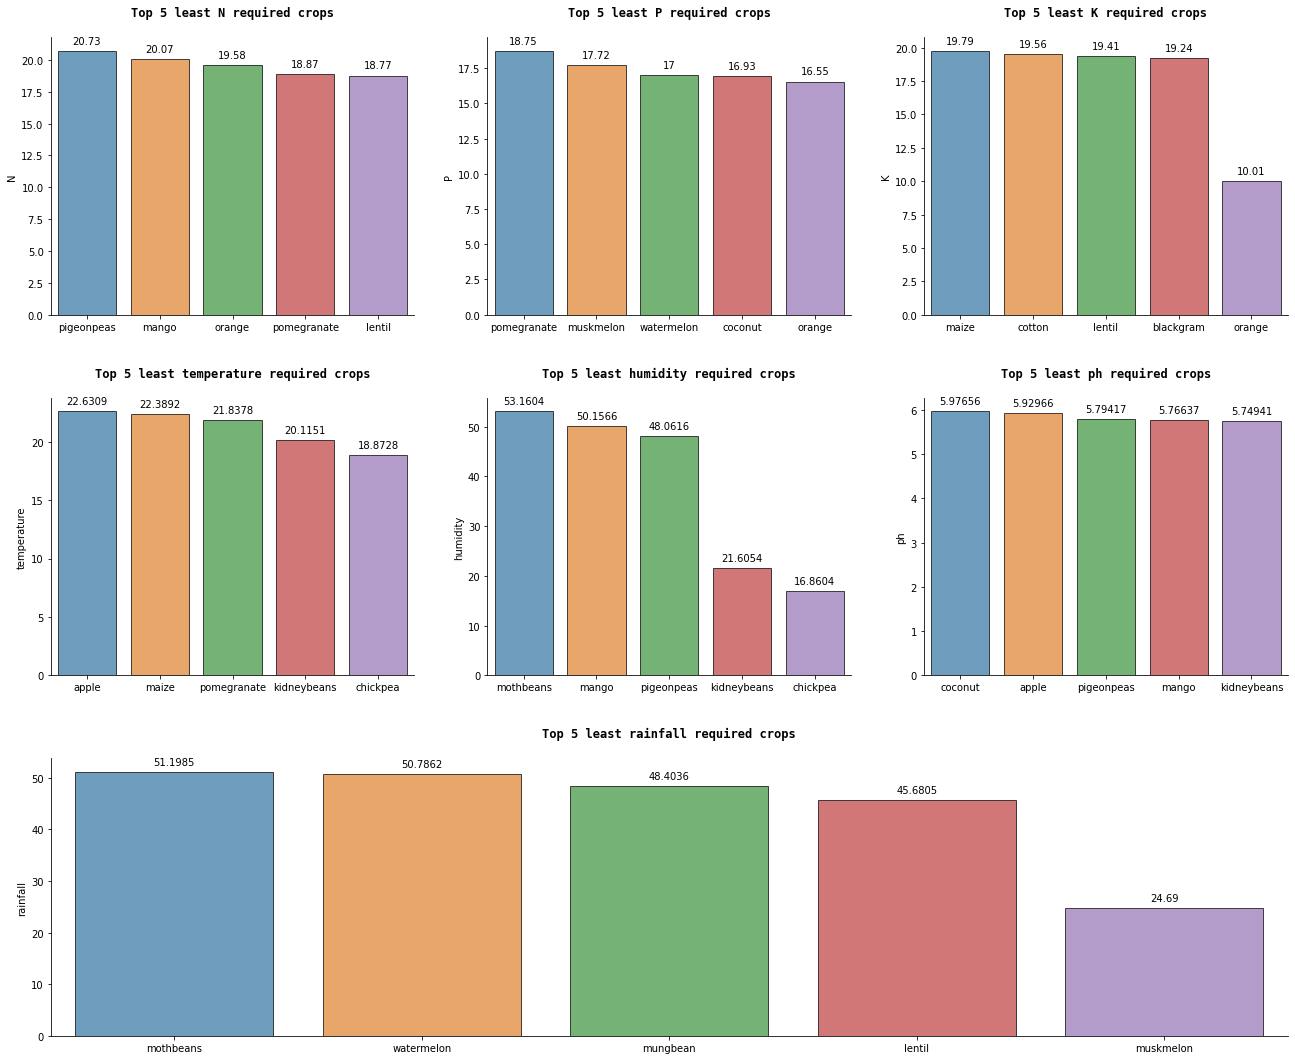

In [465]:
fig = plt.figure(figsize=(30,25))
grid = plt.GridSpec(4,4, hspace=0.3)
sns.barplot(data = df.groupby('label').mean()['N'].sort_values(ascending=False)[-5:].reset_index(), x='label', y='N', ax=fig.add_subplot(grid[1,1]),alpha=0.7, edgecolor='black')
sns.barplot(data = df.groupby('label').mean()['P'].sort_values(ascending=False)[-5:].reset_index(), x='label', y='P', ax=fig.add_subplot(grid[1,2]),alpha=0.7, edgecolor='black')
sns.barplot(data = df.groupby('label').mean()['K'].sort_values(ascending=False)[-5:].reset_index(), x='label', y='K', ax=fig.add_subplot(grid[1,3]),alpha=0.7, edgecolor='black')
sns.barplot(data = df.groupby('label').mean()['temperature'].sort_values(ascending=False)[-5:].reset_index(), x='label', y='temperature', ax=fig.add_subplot(grid[2,1]),alpha=0.7, edgecolor='black')
sns.barplot(data = df.groupby('label').mean()['humidity'].sort_values(ascending=False)[-5:].reset_index(), x='label', y='humidity', ax=fig.add_subplot(grid[2,2]),alpha=0.7, edgecolor='black')
sns.barplot(data = df.groupby('label').mean()['ph'].sort_values(ascending=False)[-5:].reset_index(), x='label', y='ph', ax=fig.add_subplot(grid[2,3]),alpha=0.7, edgecolor='black')
sns.barplot(data = df.groupby('label').mean()['rainfall'].sort_values(ascending=False)[-5:].reset_index(), x='label', y='rainfall',ax=fig.add_subplot(grid[3,1:]),alpha=0.7, edgecolor='black')
for i in fig.get_axes():
    i.set_xlabel('')
    i.spines[['top', 'right']].set_visible(False)
    for j in i.containers:
        i.bar_label(j, padding=5)
    i.set_title(f'Top 5 least {i.get_ylabel()} required crops\n', font='monospace', weight='semibold', size=12)

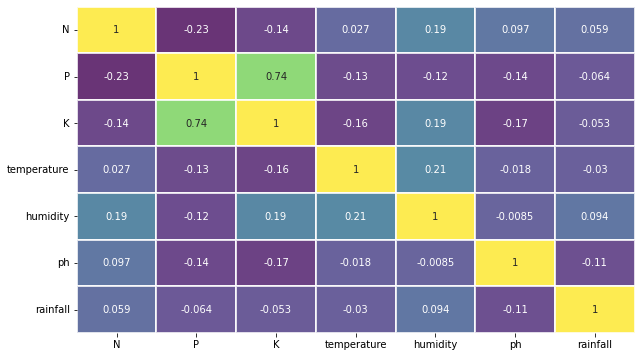

In [446]:
sns.heatmap(df.corr(), cbar=False, annot=True, cmap='viridis', linewidth=0.1,alpha=0.8)
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.xticks(rotation=360);

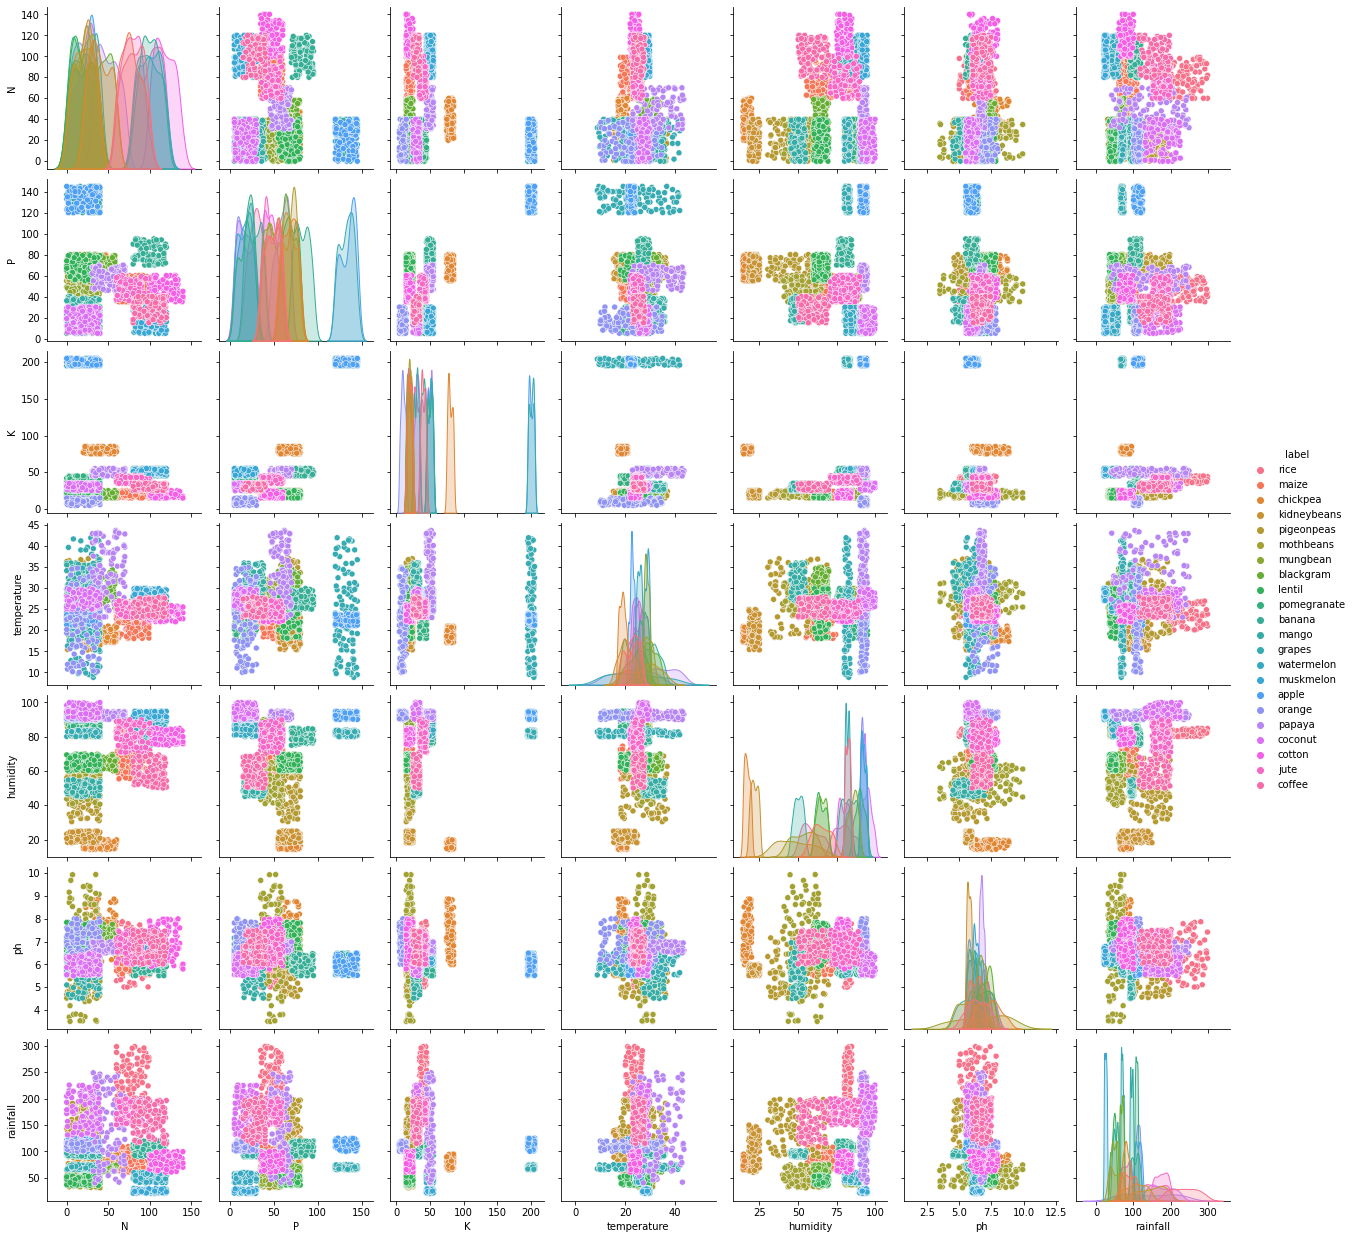

In [308]:
sns.pairplot(df, hue='label');

### data visulization with PCA

In [432]:
pca_2 = PCA(n_components=2)
PCA_2 = pca_2.fit_transform(df.drop('label', axis=1))
PCA_df = pd.DataFrame(PCA_2)
PCA_df.columns= ['component_1', 'component_2']
fig = px.scatter(PCA_df,x='component_1', y='component_2', color=df['label'] , labels={'color':'crop'}, title=f'Decomposed data with a {100*pca_2.explained_variance_ratio_.sum():1.0f}% explained variance')
fig.show()

In [431]:
pca_3 = PCA(n_components=3)
PCA_3 = pca_3.fit_transform(df.drop('label', axis=1))
PCA_df = pd.DataFrame(PCA_3)
PCA_df.columns= ['component_1', 'component_2', 'component_3']
fig = px.scatter_3d(PCA_df,x='component_1', y='component_2', z='component_3',color=df['label'] , labels={'color':'crop'}, title=f'Decomposed data with a {100*pca_3.explained_variance_ratio_.sum():1.0f}% explained variance')
fig.show()